In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# NLTK data download karna
nltk.download('stopwords')
nltk.download('punkt')

print("Ab sab sahi hai! Libraries ready hain.")

Ab sab sahi hai! Libraries ready hain.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Naya data jisme 'not', 'like' aur 'boring' ke negative examples hon
data = {
    'review': [
        "I loved this movie, it was fantastic!",
        "Worst experience ever. The acting was terrible.",
        "Average film, could have been better.",
        "Amazing plot and great characters. High recommended!",
        "I did not like this movie, it was boring",  
        "The movie was not good at all"              # <--- 'not' ka negative use
    ],
    'sentiment': [1, 0, 0, 1, 0, 0] # 1=Pos, 0=Neg
}
df = pd.DataFrame(data)



In [13]:
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not') # 'not' word sentiment ke liye bahut zaroori hai

def clean_review(text):
    # 1. Faltu symbols aur numbers hatana
    review = re.sub('[^a-zA-Z]', ' ', text)
    # 2. Sab lowercase karna aur words mein todna (Tokenization)
    review = review.lower().split()
    # 3. Stopwords hatana aur words ko unke root form mein laana (Stemming)
    # Jaise "loved" ban jayega "love"
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    return ' '.join(review)

# Poore dataset par cleaning function chalana
df['cleaned_review'] = df['review'].apply(clean_review)

print("Cleaning done! Purana vs Naya text dekhiye:")
df[['review', 'cleaned_review']]

Cleaning done! Purana vs Naya text dekhiye:


,review,cleaned_review
0,"I loved this movie, it was fantastic!",love movi fantast
1,Worst experience ever. The acting was terrible.,worst experi ever act terribl
2,"Average film, could have been better.",averag film could better
3,Amazing plot and great characters. High recomm...,amaz plot great charact high recommend
4,"I did not like this movie, it was boring",not like movi bore
5,The movie was not good at all,movi not good


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
X=cv.fit_transform(df['cleaned_review']).toarray()
y=df['sentiment'].values
print(f"X ka shape:{X.shape}")

X ka shape:(6, 22)


In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X,y)
print("model train ho gaya.")

model train ho gaya.


In [16]:
new_review="I did not like movie"
cleaned_new=clean_review(new_review)
new_X=cv.transform([cleaned_new]).toarray()
pred=classifier.predict(new_X)
if pred[0]==1:
    print(f"Review:'{new_review}'->Sentiment:POSITIVE")
else:
    print(f"Review: '{new_review}' -> Sentiment: NEGATIVE 😞")

Review: 'I did not like movie' -> Sentiment: NEGATIVE 😞


In [17]:
import pandas as pd

# 50,000 reviews  dataset 
url = 'https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv'
df_pro = pd.read_csv(url)

# Label ko numbers mein badalna (positive -> 1, negative -> 0)
df_pro['sentiment'] = df_pro['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

print(f"Dataset Loaded! Total Rows: {len(df_pro)}")
df_pro.head()

Dataset Loaded! Total Rows: 50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
print("Cleaning start now time to wait.")
df_pro['cleaned_review']=df_pro['review'].apply(clean_review)
print("Cleaning ho gai! ab dekho suga ka magic.")

Cleaning start now time to wait.
Cleaning ho gai! ab dekho suga ka magic.


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
 #text to number(TF-IDF)
cv_pro=TfidfVectorizer(max_features=5000)
X=cv_pro.fit_transform(df_pro['cleaned_review'])
y=df_pro['sentiment'].values

#Train-test split 80% tarining,20% testing
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
 #model training
model_pro=MultinomialNB()
model_pro.fit(X_train,y_train)

#Accuarcy check
y_pred=model_pro.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")


Accuracy:85.24%


In [25]:
def check_sentiment(text):
    # Wahi cleaning function 
    cleaned = clean_review(text)
    # Important: transform() use karna hai, fit_transform() nahi
    vector = cv_pro.transform([cleaned]) 
    prediction = model_pro.predict(vector)
    return "POSITIVE 😊" if prediction[0] == 1 else "NEGATIVE 😞"

# Ab test 
print(f"Result: {check_sentiment('I did not like the movie, it was boring')}")

Result: NEGATIVE 😞


In [27]:
import pickle
with open('movie_sentiment_model.pkl','wb')as model_file:
    pickle.dump(model_pro,model_file)
with open('tfidf_vectorizer.pkl','wb')as cv_file:
    pickle.dump(cv_pro,cv_file)
print("Model nd Vectorizer saved")        


Model nd Vectorizer saved


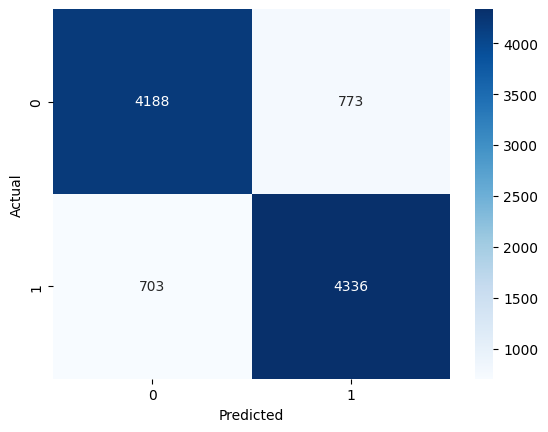

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
import pickle

# 1. Model ko save
with open('movie_sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model_pro, model_file)

# 2. Vectorizer ko save 
with open('tfidf_vectorizer.pkl', 'wb') as cv_file:
    pickle.dump(cv_pro, cv_file)

print("Files saved successfully!")

Files saved successfully!
